# Este exemplo contém apenas 1000 registros Covid19-ES

Criando Sessão

In [1]:
import atoti as tt

session = tt.create_session()

/media/msonl2/DATA/Backups_dinamicos/mv_permanentes_linux/ambientes_teste/olap/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


A tabela dim_data possui mais de 1000 registros, nestes casos é presciso aplicar a instrução "session.load_all_data()"

In [2]:
session.load_all_data()

Carregando dados do arquivo csv para a store "fato_store"

In [3]:
fato_store = session.read_csv("fato_covid19.csv", keys=["id"])

Visualizando o que foi carregado na Store

In [4]:
fato_store

Store(_name='Fato_covid19', _scenario='Base', _columns={'id': Column(name='id', data_type=DataType(java_type='int', nullable=False)), 'dcod_local': Column(name='dcod_local', data_type=DataType(java_type='int', nullable=True)), 'dcod_individuo': Column(name='dcod_individuo', data_type=DataType(java_type='int', nullable=True)), 'dcod_sint_cmorb': Column(name='dcod_sint_cmorb', data_type=DataType(java_type='int', nullable=True)), 'dim_id_data_not': Column(name='dim_id_data_not', data_type=DataType(java_type='int', nullable=True)), 'qtd': Column(name='qtd', data_type=DataType(java_type='double', nullable=True))})

In [5]:
fato_store.head()

,dcod_local,dcod_individuo,dcod_sint_cmorb,dim_id_data_not,qtd
id,,,,,
1.0,1.0,1.0,1.0,875.0,1.0
6.0,2.0,2.0,2.0,875.0,1.0
16.0,3.0,3.0,3.0,875.0,1.0
30.0,4.0,4.0,4.0,875.0,1.0
41.0,5.0,5.0,5.0,875.0,1.0


Criando um Cubo:

In [6]:
cube = session.create_cube(fato_store)

Listando hierarquias (eixos do cubo). Lembre que o propósito do cubo é visualizar alguns indicadores numéricos em específicos contexto do cubo. Estes indicadores são denominados medidas. 

In [7]:
# Aliasing the hierarchies property to a shorter variable name because we will use it a lot.
h = cube.hierarchies
h

Hierarchies()

No cubo foram criadas automaticamente hierarquias para cada campo que não é uma medida

As hierarquias são agrupadas em dimensões. Mais a frente iremos ver como mover hierarquias entre dimensões. Hiearquias são feitas e níveis. Níveis da mesma hierarquia são atributos com relacionamento pai/filho. Podemos por exemplo ter bairros, municipios e estados.

In [8]:
l = cube.levels
l

Levels()

Let's have a look at the measures of the cube that have been inferred from the data:

In [9]:
m = cube.measures
m

Measures()

O cubo cria automaticamente agregações de soma e media  para campos numéricos (não identificadores). Perecebe que uma medida pode ser utilizada para avaliar as intersecções do cubo. Podemos por exemplo utilizar a instução .query para obter o valor de soma da medida 'qtd'

**Quantity.SUM**:

<img alt="Grand total" src="images/olap/grand-total.svg" width="400" />

In [10]:
cube.query(m["qtd.SUM"])

,qtd.SUM
0,"1,000.00"


But we can also _dice_ the cube to get the quantity for each **Shop**, which means taking one _slice_ of the cube for each **Shop**:

<img alt="Dicing the cube" src="images/olap/slices.svg" width="400" />

In [11]:
cube.query(m["qtd.SUM"], levels=l["dcod_sint_cmorb"])

,qtd.SUM
dcod_sint_cmorb,
1,9.00
2,1.00
3,15.00
4,12.00
5,23.00
...,...
151,2.00
152,1.00
153,1.00


## Visualizando dados

Ao utilizar 'cube.query' obtermos uma tabela no formato pandas Dataframe, mas a melhor forma de visualizar dados multidimensionais é utilizando-se de uma pivot table.

- Após executar a instrução aplique dois cliques em uma das medidas (measures) e adicione as dimensões desejadas para realizar as análises desejadas.

![First pivot table](images/gifs/first-pivot-table.gif)

In [41]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

Podemos mudar a visualização de uma tabela para um gráfico


In [42]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

### Drilldown and filters

Multidimensional analysis is meant to be done from top to bottom: start by visualizing the indicators at the top level then drilldown to explain the top figures with more details.

For instance, we can visualize some measures per date then drilldown on **Shop** for a specific date, then see the products sold by a specific shop on this date.

Using the previous cube representation, this is like zooming more and more on a part of the cube.

<img alt="Drilldown the cube" src="images/olap/drilldown.svg" width="1200" />


In [43]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

# Função Dashboard

Podemos criar um dashboard com este modulo provendo ricos insigts. Atoti vem com uma aplicação Web que pode ser acessada fora do jupyter notebook. Para iniciar basta aplicar a instrução "session.url"

In [15]:
session.url

'http://localhost:33119'

## Enriquecendo o cubo

Vamos adicionar novos atributos e possibilidades

### Join

Carregando novas dimensoes e integrando ao cubo 

In [16]:
individuo_store = session.read_csv("dim_individuo.csv", keys=["dcod_individuo"])

Observe que a chave especificada também será integrada com a tabela fato. Estas chaves relacionam as informações correspondentes.
(Se voce tentar inserir uma nova linha com a mesma chave isso irá sobrepor a existente)

In [17]:
individuo_store.head()

,version,date_from,date_to,classificacao,evolucao,faixaetaria,idadenadatanotificacao,sexo,racacor,ficouinternado,viagembrasil,viageminternacional
dcod_individuo,,,,,,,,,,,,
0,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,1,1900-01-01 00:00:00,2199-12-31 23:59:59,Descartados,Ignorado,05 a 9 anos,"9 anos, 7 meses, 17 dias",F,Amarela,Não,Não,Não
2,1,1900-01-01 00:00:00,2199-12-31 23:59:59,Confirmados,Ignorado,50 a 59 anos,"58 anos, 5 meses, 20 dias",F,Preta,Não,Não,Não
3,1,1900-01-01 00:00:00,2199-12-31 23:59:59,Descartados,Ignorado,60 a 69 anos,"61 anos, 8 meses, 25 dias",M,Branca,Não,Não,Não
4,1,1900-01-01 00:00:00,2199-12-31 23:59:59,Descartados,Ignorado,60 a 69 anos,"64 anos, 4 meses, 11 dias",F,Parda,Não,Não,Não


Todas as informações de indivíduo estarão em linha com a tabela fato, declarando uma relação entre os objtetos store que o cubo pode utilizar para prover mais analises entre os eixos/dimensões.

In [18]:
fato_store.join(individuo_store, mapping={"dcod_individuo": "dcod_individuo"})

In [19]:
local_store = session.read_csv("dim_local.csv", keys=["dcod"])

In [20]:
data_store = session.read_csv("dim_data.csv", keys=["dim_id_data"])

In [21]:
comorb_store = session.read_csv("dim_sint_comorb.csv", keys=["dcod_sint_cmorb"])

In [22]:
fato_store.join(local_store, mapping={"dcod_local": "dcod"})

In [23]:
fato_store.join(data_store, mapping={"dim_id_data_not": "dim_id_data"})

In [24]:
fato_store.join(comorb_store, mapping={"dcod_sint_cmorb": "dcod_sint_cmorb"})

# Schema
Podemos visualizar a estrutura complata dos datastores:


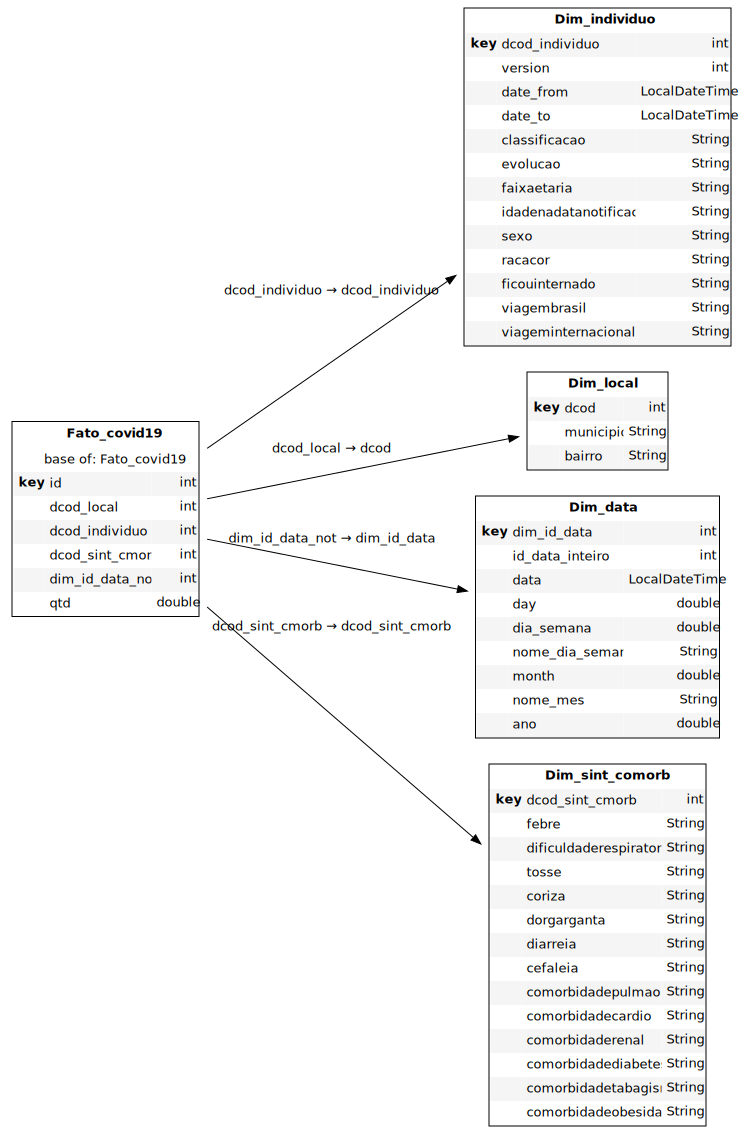

In [25]:
session.stores.schema

As novas colunas/atributos, foram adicionadas automaticamenta as dimensões e hierarquias do cubo. 

In [26]:
h

Hierarchies()

# Slice
Observe que podemos utilizar cube.query para explorar de diferentes formas o cubo.

In [27]:
cube.query(m["qtd.SUM"], levels=l["faixaetaria"])

,qtd.SUM
faixaetaria,
0 a 4 anos,35.00
05 a 9 anos,30.00
10 a 19 anos,85.00
20 a 29 anos,188.00
30 a 39 anos,277.00
40 a 49 anos,200.00
50 a 59 anos,100.00
60 a 69 anos,51.00
70 a 79 anos,20.00


In [28]:
cube.query(m["qtd.SUM"], levels=[l["faixaetaria"], l["febre"]])

qtd.SUM
faixaetaria     febre        
0 a 4 anos      Não     18.00
                Sim     17.00
05 a 9 anos     Não     21.00
                Sim      9.00
10 a 19 anos    Não     53.00
                Sim     32.00
20 a 29 anos    Não    148.00
                Sim     40.00
30 a 39 anos    Não    230.00
                Sim     47.00
40 a 49 anos    Não    152.00
                Sim     48.00
50 a 59 anos    Não     80.00
                Sim     20.00
60 a 69 anos    Não     36.00
                Sim     15.00
70 a 79 anos    Não     15.00
                Sim      5.00
80 a 89 anos    Não      7.00
                Sim      1.00
90 anos ou mais Não      5.00
                Sim      1.00

Podemos realizar um dice com 2 diferentes eixos e obter a quantidade por exemplo por produto e data.

<img alt="Pivot table" src="images/olap/pivot-table.svg" width="400" />

In [29]:
cube.query(m["qtd.SUM"], levels=[l["sexo"], l["racacor"]])

qtd.SUM
sexo racacor         
F    Amarela    41.00
     Branca    174.00
     Ignorado  105.00
     Indigena    1.00
     Parda     187.00
     Preta      38.00
I    Ignorado    1.00
M    Amarela    22.00
     Branca    105.00
     Ignorado  105.00
     Indigena    1.00
     Parda     186.00
     Preta      34.00

Podemos combinar estas operações para fatiar uma hiearquia e ralizar dice nas outras duas:

<img alt="Slice and dice" src="images/olap/slice-and-dice.svg" width="400" />


In [30]:
cube.query(
    m["qtd.SUM"],
    levels=[l["sexo"], l["racacor"]],
    condition=l["racacor"] == "Preta",
)

,,qtd.SUM
sexo,racacor,
F,Preta,38.00
M,Preta,34.00


#### Criando agregador Max 

Criando agregador max para quantidade:

In [31]:
m["Max qtd"] = tt.agg.max(fato_store["qtd"])

Nova medida ficará imediatamente disponível:

In [32]:
cube.query(m["Max qtd"], include_totals=True, levels=l["faixaetaria"])

,Max qtd
faixaetaria,
Total,1.00
0 a 4 anos,1.00
05 a 9 anos,1.00
10 a 19 anos,1.00
20 a 29 anos,1.00
30 a 39 anos,1.00
40 a 49 anos,1.00
50 a 59 anos,1.00
60 a 69 anos,1.00


#### Valor cumulativo em função da data

A soma cumulativa é uma soma parcial em função de um determinado nível (neste caso a data) 

In [33]:
m["Cumulative qtd"] = tt.agg.sum(
    m["qtd.SUM"], scope=tt.scope.cumulative(l["data"])
)

![Cumulative amount](images/gifs/cumulative-amount.png)

In [34]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [35]:
h

Hierarchies()

Adicionando uma hierarquia composta com base em duas simples

In [36]:
h["Viagem"] = [l["viagembrasil"],l["viageminternacional"]]

And let's remove the old hierarchies:

In [37]:
del h["viagembrasil"]
del h["viageminternacional"]

In [38]:
h

Hierarchies()

Nós também podemos fazer isso com **bairro**, **Municipio** para construir a hierarquia  **local**.
Perceba que neste caso ao inves de utilizar os niveis nos vamos definir a hieraquia com campos/niveis do objeto local_store:

In [39]:
h["local"] = [
    local_store["municipio"],
    local_store["bairro"],
]
del h["municipio"]
del h["bairro"]

Dimensões reagrupam hierarquias.

In [40]:
h["local"].dimension = "Location"
h

Hierarchies()

Observe que agora temos a vantagem de um estrutura multinível para a localização.

# References: 
https://www.atoti.io/